# Implementing DBSCAN clustering algorithm
In this project, we want to implement k-mean algorithm, then we are going to imply it on a non-linear datasets and see the result

## Importing Dataset

In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style



In [2]:
def read_dataset(path, name):
    df = pd.read_csv(path + name)
    return df


In [3]:
df = read_dataset("datasets/", "worms.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)

             X       Y
0       4260.1  3476.0
1       4276.3  3475.6
2       4260.2  3475.3
3       4244.4  3494.8
4       4270.0  3467.1
...        ...     ...
105595  3567.9  3583.4
105596  3383.9  3897.8
105597  3259.6  2970.7
105598  2688.7  2958.6
105599  4095.2  2344.0

[105600 rows x 2 columns]


## DBSCAN algorithm using sklearn
implying DBSCAN algorithm on our dataset using sklearn library

In [4]:
#setting the algorithm prameters
epsilon = 35
min_samples = 145

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 28
Estimated number of noise points: 49754


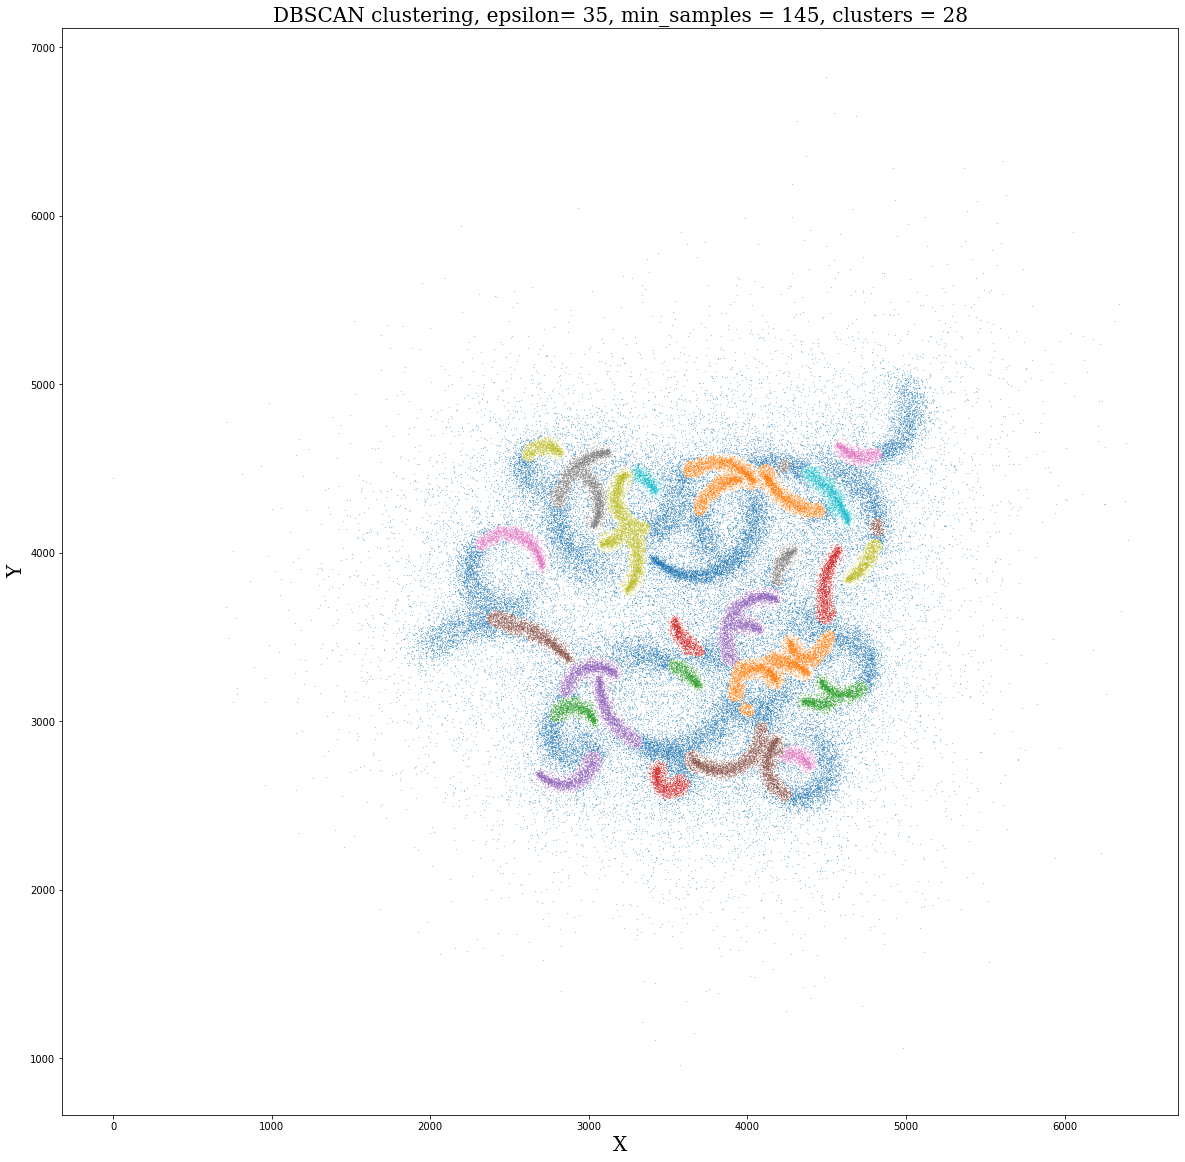

In [5]:
df_clustered = df.copy()       
df_clustered.loc[:, "Cluster"] = labels

fig, ax = plt.subplots(figsize=(20, 20))
font1 = {'family':'serif','color':'black','size':20}

plt.xlabel("X", fontdict = font1)
plt.ylabel("Y", fontdict = font1)

groups = df_clustered.groupby("Cluster")
for name, group in groups:
    plt.plot(group["X"], group["Y"], marker=".", markersize=0.3, linestyle="", label=name)


plt.title('DBSCAN clustering, ''epsilon= '+str(epsilon)+', min_samples = '+str(min_samples)+', clusters = '+str(n_clusters_), fontdict = font1)


plt.show()